In [1]:
from inhipy.cells.classify import run_get_cell_stats
%load_ext yamlmagic

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tif
# tqdm 
from tqdm import tqdm

In [2]:
%%yaml cell_stat_config

name: testing
input:
    fixed multichannel image: /ply/repos/u01/synapse/data/full_pipeline/2023-04-05_15dpf_GAD1b_Full experiment/Fish2-Fixed-561HuC_405DAPI.lsm
    segmentation image: /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/nuclei_segmentation/stardist_3d/nuclei_segmentation_labels.tif
    channels:
        gfp: 0
        hucd: 1
        dapi: 2
output:
    basedir: /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/
    file: cell_statistics.csv  

<IPython.core.display.Javascript object>

In [3]:
run_get_cell_stats(cell_stat_config)

  3%|▎         | 231/8715 [00:33<20:15,  6.98it/s]

In [32]:
# normalize cell intensities
avg_intensity_gfp = np.array(avg_intensity_gfp)
avg_intensity_hucd = np.array(avg_intensity_hucd)
avg_intensity_dapi = np.array(avg_intensity_dapi)

norm_intensity_gfp = (avg_intensity_gfp - np.min(avg_intensity_gfp))/ np.max(avg_intensity_gfp)
norm_intensity_hucd = (avg_intensity_hucd - np.min(avg_intensity_hucd))/ np.max(avg_intensity_hucd)
norm_intensity_dapi = (avg_intensity_dapi - np.min(avg_intensity_dapi))/ np.max(avg_intensity_dapi)

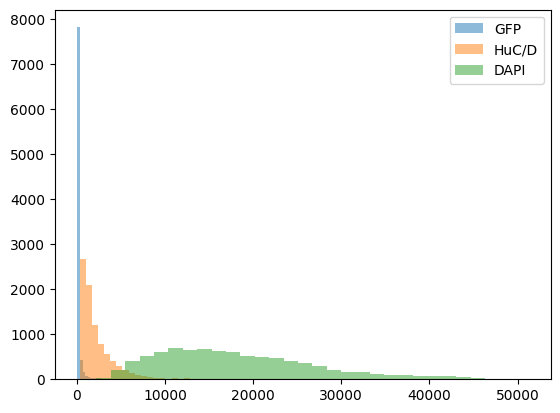

In [30]:
# Plot histograms
plt.hist(avg_intensity_gfp, bins=30, alpha=0.5, label='GFP')
plt.hist(avg_intensity_hucd, bins=30, alpha=0.5, label='HuC/D')
plt.hist(avg_intensity_dapi, bins=30, alpha=0.5, label='DAPI')
plt.legend(loc='upper right')
plt.show()


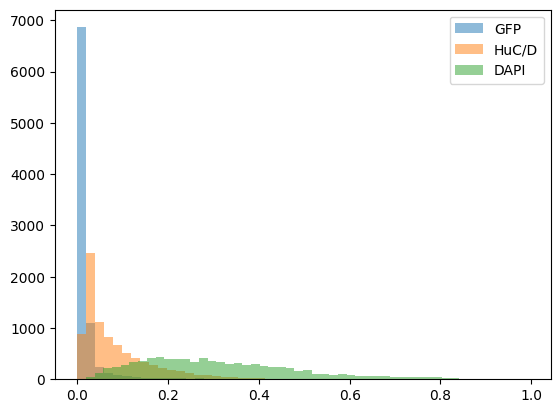

In [34]:
# Plot histograms
plt.hist(norm_intensity_gfp, bins=50, alpha=0.5, label='GFP')
plt.hist(norm_intensity_hucd, bins=50, alpha=0.5, label='HuC/D')
plt.hist(norm_intensity_dapi, bins=50, alpha=0.5, label='DAPI')
plt.legend(loc='upper right')
plt.show()

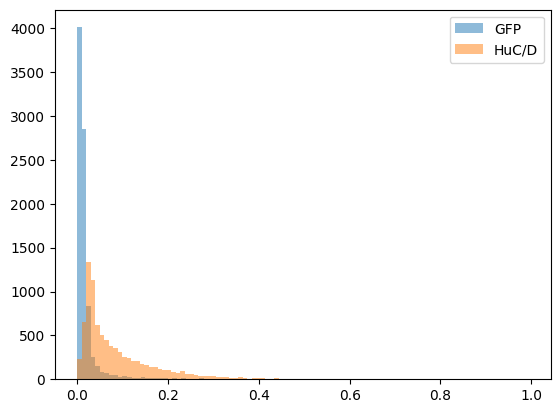

In [38]:
# Plot histograms
plt.hist(norm_intensity_gfp, bins=100, alpha=0.5, label='GFP')
plt.hist(norm_intensity_hucd, bins=100, alpha=0.5, label='HuC/D')
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'HuC/D')

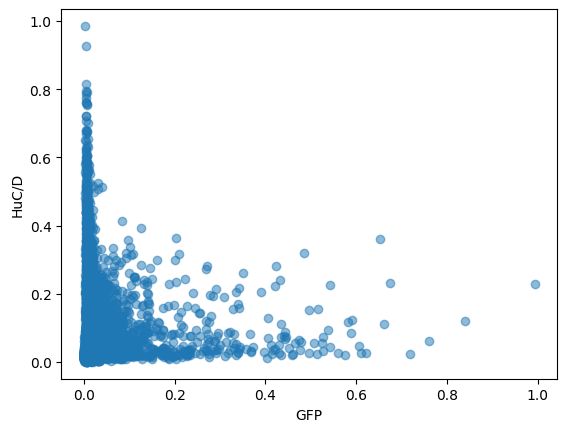

In [44]:
# plot scatter plot of intensities in gfp and hucd channels
plt.scatter(norm_intensity_gfp, norm_intensity_hucd, alpha=0.5)
plt.xlabel('GFP')
plt.ylabel('HuC/D')